In [121]:
import oandapyV20
import oandapyV20.endpoints.instruments as instruments
import oandapyV20.endpoints.pricing as pricing
import oandapyV20.endpoints.accounts as accounts
import oandapyV20.endpoints.orders as orders
import oandapyV20.endpoints.trades as trades
import pandas as pd
import datetime as dt 

key = '#####'
client = oandapyV20.API(access_token=key)
id = '###'

pair = "USD_JPY"
#get historical data (candles)
params = {"count": 150,"granularity": "H1"} 
#granularity can be in seconds S5 - S30, minutes M1 - M30, hours H1 - H12, days D, weeks W or months M
candles = instruments.InstrumentsCandles(instrument= pair, params=params)
client.request(candles)
#print(candles.response)
ohlc_dict = candles.response["candles"]
ohlc = pd.DataFrame(ohlc_dict)
ohlc_df = ohlc.mid.dropna().apply(pd.Series)
ohlc_df["volume"] = ohlc["volume"]
ohlc_df.index = ohlc["time"]
ohlc_df = ohlc_df.apply(pd.to_numeric)
df = ohlc_df

In [122]:
import datetime 
from datetime import datetime
import numpy as np
from pyti.hull_moving_average import hull_moving_average as hma
import matplotlib.pyplot as plt
%matplotlib inline

In [138]:
df['c'] = df.c.astype(float)
frequency = pd.date_range(pd.to_datetime(df.index[0]), periods=len(df.index), freq='1D')
frequency = frequency.strftime("%Y-%m-%d")
df = df.set_index(pd.DatetimeIndex(frequency))
df

,o,h,l,c,volume,fast_MA,slow_MA,fast_HMA,slow_HMA
2020-11-12,105.128,105.172,105.101,105.160,3535,NaN,NaN,NaN,NaN
2020-11-13,105.159,105.236,105.150,105.208,2233,NaN,NaN,NaN,NaN
2020-11-14,105.206,105.230,105.096,105.149,2550,NaN,NaN,NaN,NaN
2020-11-15,105.150,105.182,105.090,105.090,2317,NaN,NaN,NaN,NaN
2020-11-16,105.088,105.148,105.070,105.132,2258,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2021-04-06,103.816,103.856,103.806,103.836,1818,103.807111,103.814500,103.813756,103.801499
2021-04-07,103.838,103.859,103.813,103.824,1100,103.809778,103.813389,103.828374,103.807654
2021-04-08,103.825,103.846,103.810,103.822,987,103.808889,103.810667,103.834263,103.813410
2021-04-09,103.824,103.844,103.812,103.822,1367,103.811111,103.810111,103.832707,103.818450


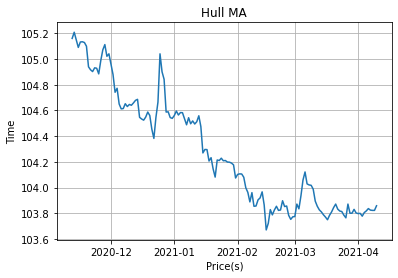

In [131]:
fig, ax = plt.subplots()
ax.plot(df.index, df['c'])
ax.set(xlabel='Price(s)', ylabel='Time',
       title='Hull MA')
ax.grid()
plt.show()

In [133]:
fast = 9
slow = 18
df['fast_MA'] = df['c'].rolling(fast).mean()
df['slow_MA'] = df['c'].rolling(slow).mean()

In [136]:
fast = 9
slow = 18
df['fast_HMA'] = hma(df['c'], fast)
df['slow_HMA'] = hma(df['c'], slow)
df.columns

Index(['o', 'h', 'l', 'c', 'volume', 'fast_MA', 'slow_MA', 'fast_HMA',
       'slow_HMA'],
      dtype='object')

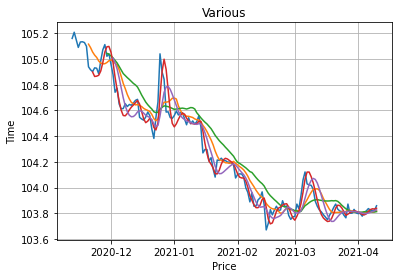

In [137]:
fig, ax = plt.subplots()
a = df[['c', 'fast_MA', 'slow_MA', 'fast_HMA',
       'slow_HMA']]
ax.plot(df.index, a)
ax.set(xlabel='Price', ylabel='Time',
       title='Various')
ax.grid()
plt.show()